<a href="https://colab.research.google.com/github/kimhwidam/Maching_Learning/blob/main/ML_6%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML 6일차 - Logistic Regression, 앙상블 기법

### Logistic Regression

Logistic Function 간단히 확인

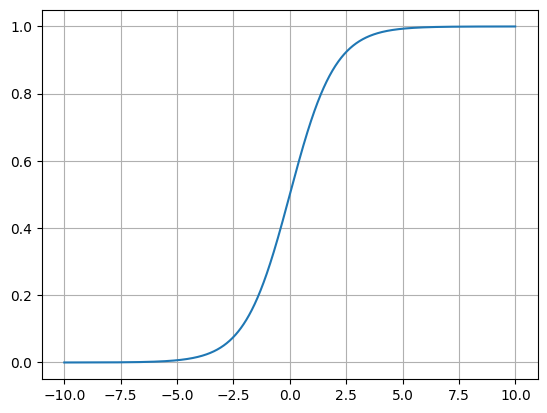

In [2]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-10, 10, 0.01)
g = 1 / (1+np.exp(-z))

plt.plot(z, g)
plt.grid()
plt.show()

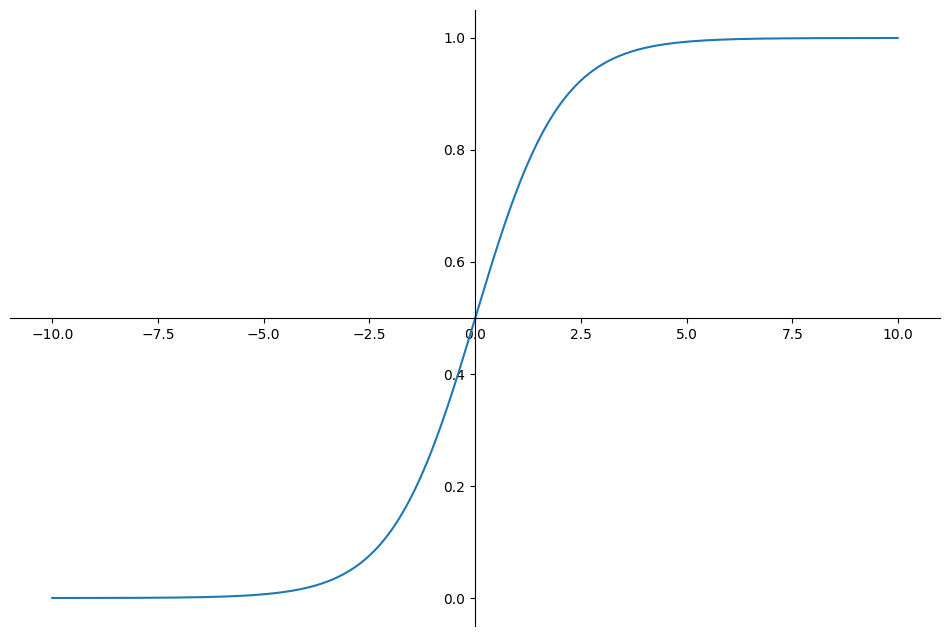

In [3]:
# 조금 디테일 있게
plt.figure(figsize=(12, 8))
ax = plt.gca()

ax.plot(z, g)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.show()

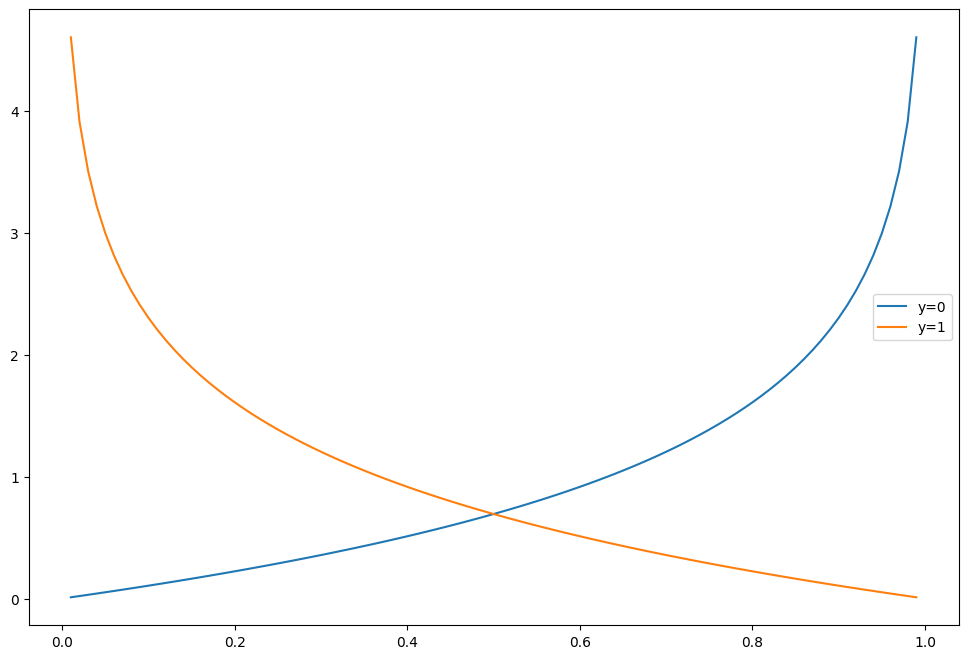

In [4]:
# Logistic Regression의 Cost Function의 그래프
h = np.arange(0.01, 1, 0.01)

c0 = -np.log(1-h)
c1 = -np.log(h)

plt.figure(figsize=(12, 8))
plt.plot(h, c0, label='y=0')
plt.plot(h, c1, label='y=1')
plt.legend()

plt.show()

## 실습 예제 1 - 와인 데이터

데이터 출처 - https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv

In [5]:
# 데이터 불러오기
import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'
wine = pd.read_csv(wine_url, index_col=0)
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [6]:
# Logistic Regression으로 학습 후 정확도
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  0.7427361939580527
Test Acc:  0.7438461538461538


In [7]:
# 스케일러까지 적용해서 파이프라인 구축
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()),
              ('clf', LogisticRegression(solver='liblinear', random_state=13))]

pipe = Pipeline(estimators)
pipe.fit(X_train, y_train)

y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  0.7444679622859341
Test Acc:  0.7469230769230769


파이프라인과 스케일러를 사용하니 약간의 상승효과가 있긴 함

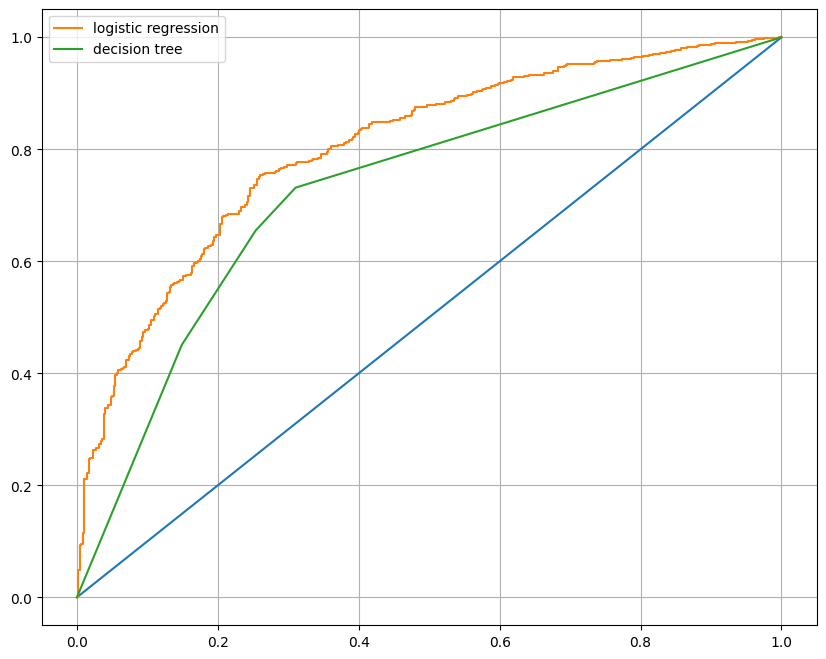

In [9]:
# Decision Tree와 비교
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

models = {'logistic regression': pipe, 'decision tree': wine_tree}

plt.figure(figsize=(10, 8))
plt.plot([0,1], [0,1])
for model_name, model in models.items():
    pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, label=model_name)

plt.grid()
plt.legend()
plt.show()

Logistic Regression의 성능이 더 좋은 것으로 확인

## 실습 예제 2 - PIMA 인디언 당뇨병 예측

데이터 출처 - https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/diabetes.csv

In [14]:
# 데이터 읽어오기
pima_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/diabetes.csv'
pima = pd.read_csv(pima_url)
pima.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
# 데이터 자료형을 모두 실수형으로 바꾸기
pima = pima.astype('float')
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


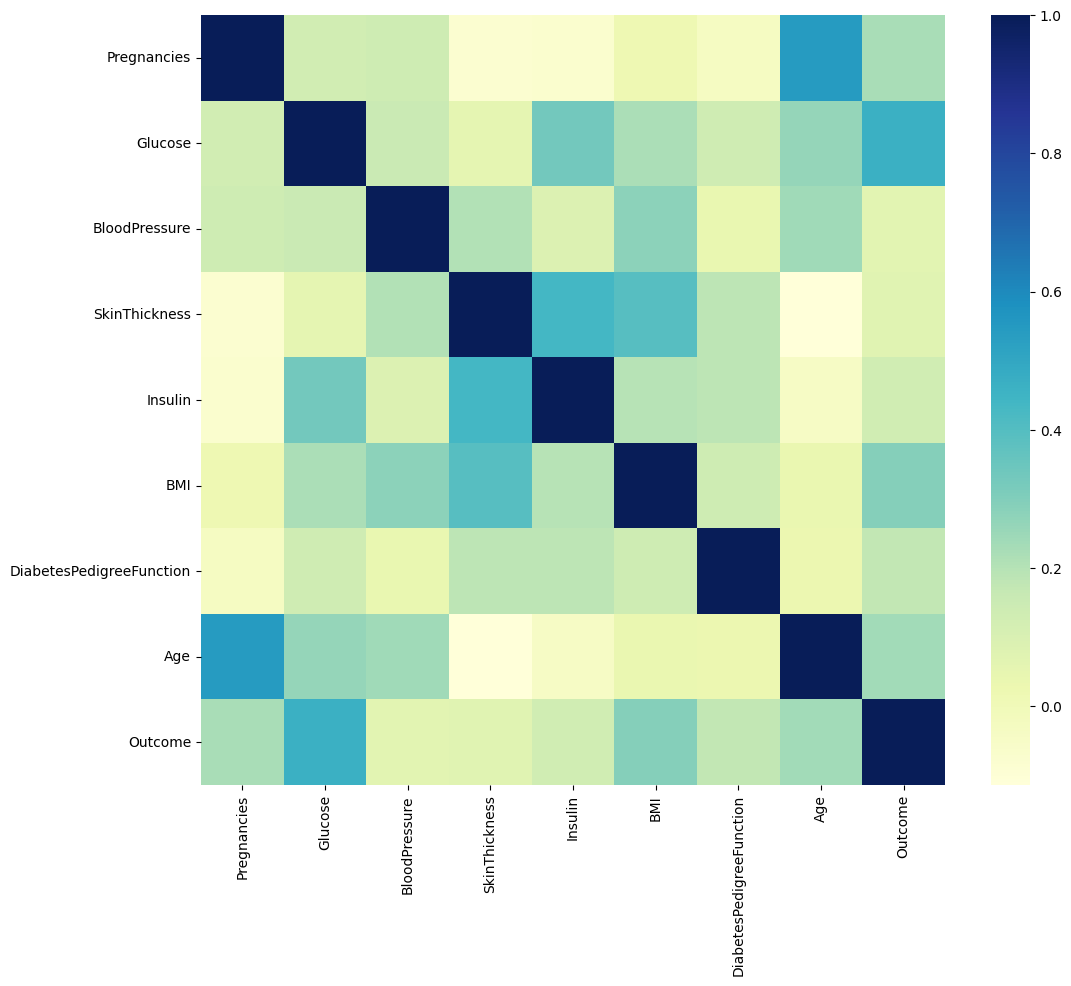

In [16]:
# 먼저 상관관계 분석
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(pima.corr(), cmap='YlGnBu')
plt.show()

그런데, 살펴보니 0이 특정 컬럼들 값에 들어있다

In [17]:
# 0값 확인
(pima==0).astype(int).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

0이라는 숫자가 혈압에 있다는 것은 문제

In [18]:
# 일단 평균값으로 대체
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
pima[zero_features] = pima[zero_features].replace(0, pima[zero_features].mean())
(pima==0).astype(int).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [19]:
# 스케일러와 파이프라인을 사용해서 Logistic Regression으로 학습 후 몇몇 수치들 확인
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score

X = pima.drop(['Outcome'], axis=1)
y = pima['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

estimators = [('scaler', StandardScaler()),
              ('clf', LogisticRegression(solver='liblinear', random_state=13))]

pipe_lr = Pipeline(estimators)
pipe_lr.fit(X_train, y_train)

pred = pipe_lr.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, pred))
print('Recall: ', recall_score(y_test, pred))
print('Precision: ', precision_score(y_test, pred))
print('Auc score: ', roc_auc_score(y_test, pred))
print('f1 score: ', f1_score(y_test, pred))

Accuracy:  0.7727272727272727
Recall:  0.6111111111111112
Precision:  0.7021276595744681
Auc score:  0.7355555555555556
f1 score:  0.6534653465346535


그러나 상대적 의미를 가질 수 없어서 이 수치 자체를 평가할 수는 없음

In [20]:
# 다변수 방정식의 각 계수 값 확인 가능
coeff = list(pipe_lr['clf'].coef_[0])
labels = list(X_train.columns)
coeff

[0.3542658884412648,
 1.2014244425037581,
 -0.15840135536286715,
 0.03394657712929963,
 -0.16286471953988135,
 0.620404521989511,
 0.3666935579557874,
 0.1719596544703511]

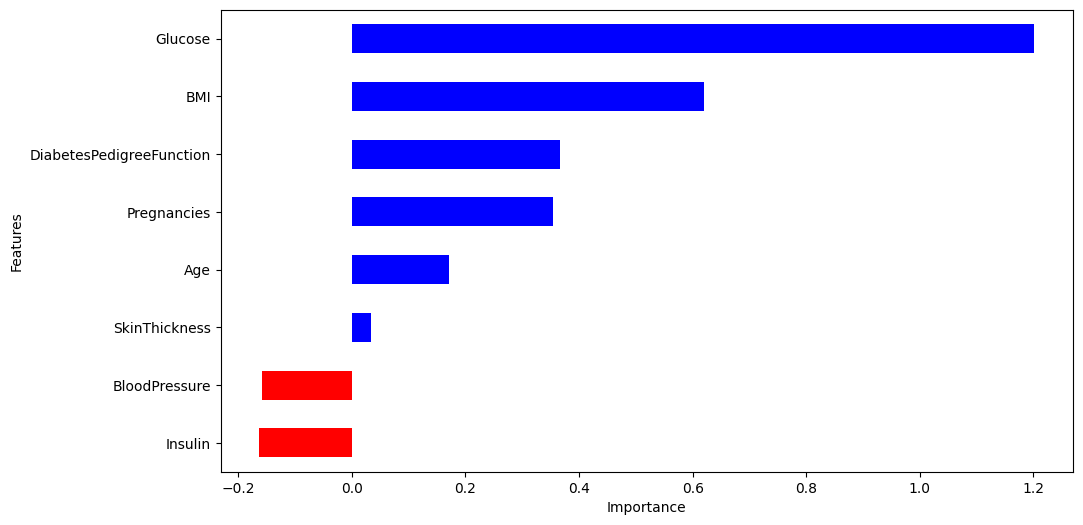

In [22]:
# 중요한 feature에 대해 시각화
features = pd.DataFrame({'Features': labels, 'importance': coeff})
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features['importance'].plot(kind='barh', figsize=(11, 6), color=features['positive'].map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')
plt.show()

* 포도당, BMI 등은 당뇨에 영향을 미치는 정도가 높음
* 혈압은 예측에 부정적 영향을 줌
* 연령이 BMI보다 출력 변수와 더 관련되어 있지만 모델은 BMI와 Glucose에 더 의존

## 정밀도와 재현율의 트레이드오프

In [23]:
# 와인 데이터를 다시 불러와서 로지스틱 회귀 적용
wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'
wine = pd.read_csv(wine_url, index_col=0)

wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  0.7427361939580527
Test Acc:  0.7438461538461538


In [24]:
# 각각의 수치 표현
from sklearn.metrics import classification_report

print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.68      0.58      0.62       477
         1.0       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.71      1300
weighted avg       0.74      0.74      0.74      1300



* macro avg: 각 클래스별 precision, recall, f1-score, support의 평균
* weighted avg: 클래스별 분포를 반영

In [25]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, lr.predict(X_test)))

[[275 202]
 [131 692]]


* 0라인 | 0이라고 한 갯수, 1이라고 한 갯수 : [275,202]
* 1라인 | 0이라고 한 갯수, 1이라고 한 갯수 : [130,693]

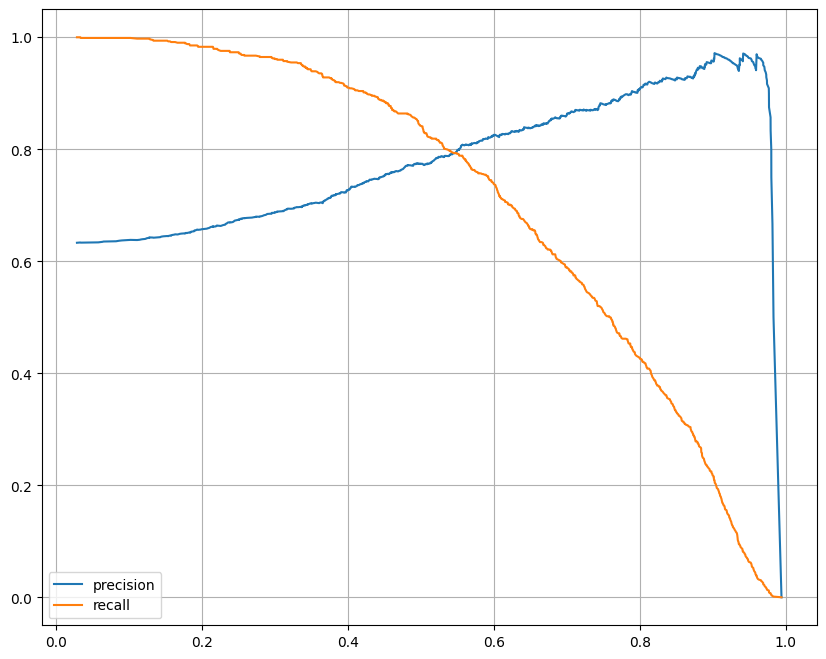

In [27]:
# precision recall curve
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 8))
pred = lr.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred)
plt.plot(thresholds, precisions[:len(thresholds)], label='precision')
plt.plot(thresholds, recalls[:len(thresholds)], label='recall')
plt.grid()
plt.legend()
plt.show()

In [29]:
# threshold를 따로 지정하지 않으면 0.5가 디폴트
pred_proba = lr.predict_proba(X_test)
pred_proba[:3]

array([[0.40537064, 0.59462936],
       [0.51023887, 0.48976113],
       [0.10180603, 0.89819397]])

In [30]:
# pred_proba, y_pred_test 둘을 붙여 줌
import numpy as np

np.concatenate([pred_proba, y_pred_test.reshape(-1,1)], axis=1)

array([[0.40537064, 0.59462936, 1.        ],
       [0.51023887, 0.48976113, 0.        ],
       [0.10180603, 0.89819397, 1.        ],
       ...,
       [0.22538943, 0.77461057, 1.        ],
       [0.67355628, 0.32644372, 0.        ],
       [0.31430379, 0.68569621, 1.        ]])

In [32]:
# threshold 바꿔보기
# Binarizer -> threshold를 사용자의 지정을 받아서 0과 1을 바꿔주는 명령어
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.6).fit(pred_proba)
pred_bin = binarizer.transform(pred_proba)[:, 1]
pred_bin

array([0., 0., 1., ..., 1., 0., 1.])

In [33]:
# 다시 수치 확인
print(classification_report(y_test, pred_bin))

              precision    recall  f1-score   support

         0.0       0.62      0.73      0.67       477
         1.0       0.82      0.74      0.78       823

    accuracy                           0.73      1300
   macro avg       0.72      0.73      0.72      1300
weighted avg       0.75      0.73      0.74      1300



In [35]:
print(confusion_matrix(y_test, pred_bin))

[[348 129]
 [216 607]]


### 앙상블 기법

## 실습 예제 - HAR 데이터

데이터 출처 - https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt

In [43]:
# 데이터 불러오기
url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt'
har = pd.read_csv(url, sep='\s+', header=None,
                  names=['column_index', 'column_name'])
har.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [44]:
har.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   column_index  561 non-null    int64 
 1   column_name   561 non-null    object
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


In [45]:
# 특징 이름만 추출
feature_name = har.iloc[:, 1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [47]:
# X 데이터만 불러오기
X_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt'
X_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt'

X_train = pd.read_csv(X_train_url, sep='\s+', header=None)
X_test = pd.read_csv(X_test_url, sep='\s+', header=None)

In [48]:
X_train.columns = feature_name
X_test.columns = feature_name
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [49]:
# y 데이터만 읽어오기
y_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt'
y_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt'

y_train = pd.read_csv(y_train_url, sep='\s+', header=None, names=['action'])
y_test = pd.read_csv(y_test_url, sep='\s+', header=None, names=['action'])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

In [50]:
# 각 액션별 데이터의 수
y_train['action'].value_counts()

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

* 1 = Walking
* 2 = Walking Upstairs
* 3 = Walking Downstairs
* 4 = Sitting
* 5= Standing
* 6 = Laying

#### 먼저 Decision Tree

In [52]:
# Decision Tree로 학습 후 정확도
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

accuracy_score(y_test, pred)

0.8096369189005769

In [53]:
# max_depth를 다양하게 하기 위해 GridSearchCV 이용
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy',
                       cv=5, return_train_score=True)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=13),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [55]:
# 최적의 점수
# max_depth는 8이 좋음
grid_cv.best_score_, grid_cv.best_params_

(0.8543335321892183, {'max_depth': 8})

In [57]:
# 표로 성능을 정리
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df = cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]
cv_results_df

,param_max_depth,mean_test_score,mean_train_score
0,6,0.843444,0.944879
1,8,0.854334,0.982692
2,10,0.847125,0.993369
3,12,0.841958,0.997212
4,16,0.841958,0.999660
5,20,0.842365,0.999966
6,24,0.841821,1.000000


train과 test의 score 차이가 좀 있음..

In [58]:
# 실제 test 데이터에서의 결과
max_depths = [6, 8, 10, 12, 16, 20, 24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('Max_Depth =', depth, ', Accuracy =', accuracy)

Max_Depth = 6 , Accuracy = 0.8557855446216491
Max_Depth = 8 , Accuracy = 0.8707159823549372
Max_Depth = 10 , Accuracy = 0.8673227010519172
Max_Depth = 12 , Accuracy = 0.8646080760095012
Max_Depth = 16 , Accuracy = 0.8574821852731591
Max_Depth = 20 , Accuracy = 0.8547675602307431
Max_Depth = 24 , Accuracy = 0.8547675602307431


In [59]:
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)

accuracy_score(y_test, pred1)

0.8734306073973532

베스트 모델의 결과 max_depth=8일 때이다.

#### 이제 Random Forest로

In [61]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth': [6, 8, 10], # DecisionTree에 적용할 파라미터
    'n_estimators': [50, 100, 200], # DecisionTree에 tree 몇개
    'min_samples_leaf': [8, 12], # DecisionTree에 맨끝 데이터(leaf) 최소 몇개
    'min_samples_split': [8, 12] # 분할 기준에서 최소한으로 남는 데이터 수 (큰영향 X)
}

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

In [62]:
# 결과 정리
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [63]:
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_depth']
cv_results_df[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
28,1,0.915125,100,10
25,1,0.915125,100,10
23,3,0.912813,200,8
20,3,0.912813,200,8
35,5,0.912541,200,10


성능이 좋다

In [64]:
# best 모델
grid_cv.best_params_, grid_cv.best_score_

({'max_depth': 10,
  'min_samples_leaf': 8,
  'min_samples_split': 8,
  'n_estimators': 100},
 0.9151251360174102)

In [65]:
# 테스트 데이터에 적용
rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(X_train, y_train)

pred1 = rf_clf_best.predict(X_test)

accuracy_score(y_test, pred1)

<ipython-input-65-cdf9e5b1994b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf_best.fit(X_train, y_train)


0.9205972175093315

In [66]:
# 중요 특성 확인
best_cols_values = rf_clf_best.feature_importances_
best_cols = pd.Series(best_cols_values, index=X_train.columns)
top20_cols = best_cols.sort_values(ascending=False)[:20]
top20_cols

angle(X,gravityMean)               0.034638
tGravityAcc-max()-Y                0.032518
tGravityAcc-energy()-X             0.031309
tGravityAcc-mean()-X               0.029513
tGravityAcc-min()-X                0.027775
tGravityAcc-max()-X                0.027662
angle(Y,gravityMean)               0.026553
tGravityAcc-mean()-Y               0.026052
tGravityAcc-min()-Y                0.023037
tGravityAcc-energy()-Y             0.018678
tGravityAcc-mean()-Z               0.015688
angle(Z,gravityMean)               0.012837
fBodyAcc-mad()-X                   0.012558
tBodyAcc-max()-X                   0.011970
fBodyAccJerk-bandsEnergy()-1,24    0.011803
tBodyAccJerk-entropy()-X           0.011647
tGravityAccMag-std()               0.011451
tBodyAccJerk-energy()-X            0.011333
tGravityAcc-arCoeff()-Z,1          0.011257
fBodyAccJerk-max()-X               0.011040
dtype: float64

각 특성들의 중요도가 개별적으로 높지 않음

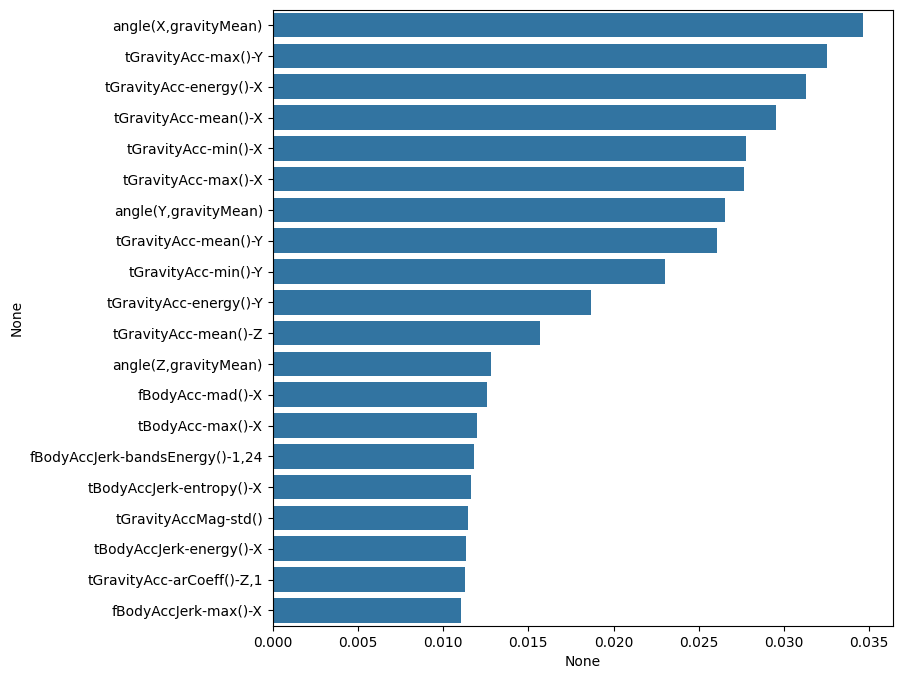

In [67]:
# 주요 특성 관찰
import seaborn as sns

plt.figure(figsize=(8,8))
sns.barplot(x=top20_cols, y=top20_cols.index)
plt.show()

561개의 특성을 굳이 다 안 써도 될 듯 함 -> 주요 특성 몇가지만 가지고 와서 써보자

In [68]:
# 2개 특성만 가지고 다시 성능 확인
X_train_re = X_train[top20_cols.index]
X_test_re = X_test[top20_cols.index]

rf_clf_best_re = grid_cv.best_estimator_
rf_clf_best_re.fit(X_train_re, y_train.values.reshape(-1,))

pred1_re = rf_clf_best_re.predict(X_test_re)

accuracy_score(y_test, pred1_re)

0.8177807940278249

561개의 특성보다 20개 특성만 보면 속도가 빠름, 정확도는 높진 않지만 -> 이런 과정을 해보면 어떨까라는 아이디어가 필요함